# Sectioin 5. Evaluation, Boundaries, and Generalization (Some more ML Concepts)

## Understanding the Decision Boundary

The **Decision Boundary** is the abstract line or surface that separates different classes in the feature space. It shows where the model switches its prediction from one class to another.


<center>
<img src="https://miro.medium.com/v2/1*aE8XLyApqvaQA9B7MWjjlA.png
" alt="Pandas Illustration" width="600">
</center>

### KNN and its Boundary

For KNN, the decision boundary is inherently complex and non-linear. Its shape is directly dependent on the training data points and the value of $k$:

* The boundary exists where the majority vote of the $k$ closest neighbors changes.
* A **small $k$** results in a very jagged, flexible boundary.
* A **large $k$** results in a very smooth, simple boundary.



<center>
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*EWTAwUQrimxdgRXICZYnjw.png" alt="Pandas Illustration" width="600">
</center>

For example, here for **K=1**:
- Ignores broader patterns, focusing only on the closest point.
- Decision Boundary: Irregular and jagged—highly sensitive to individual data points.
- Behavior: Overfits—memorizes training data and lacks generalization.

For **K=N** (All Data Points as Neighbors):
- Decision Boundary: Smooth and overly simplistic.
- Behavior: Underfits—ignores local structure and treats the entire dataset as a single group.
- Predicts the mode (classification) or average (regression) for all new points.



## The Core Challenge: Generalization, Overfitting, and Underfitting

### Generalization

The ultimate goal of Machine Learning is **generalization**: the model's ability to perform well on new, previously unseen data. The **Test Set** is the only reliable way to measure this. Poor generalization results from either Underfitting or Overfitting.

<center>
<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png" alt="Pandas Illustration" width="600">
</center>




### The Bias-Variance Trade-off

Model performance is a balance between two types of errors:

1.  **Bias (Underfitting):** The error introduced by the model being **too simple** to capture the true patterns.
2.  **Variance (Overfitting):** The error introduced by the model being **too complex** and capturing noise/outliers specific to the training data.

### Underfitting (High Bias)

* **Definition:** The model is **too simple** and fails to learn the basic patterns.
* **Indicator:** **Low** accuracy on **both** Training and Test data.
* **In KNN:** Caused by a **very large $k$**. The model is too constrained by averaging too many points.




###  Underfitting vs Overfitting
| Type | Description | Visual Intuition |
|------|--------------|------------------|
| Underfitting | Model too simple — fails to capture patterns | High train & test error |
| Overfitting | Model too complex — memorizes training data | Low train, high test error |

### Overfitting (High Variance)

* **Definition:** The model learns the training data *too well*, memorizing noise instead of general rules.
* **Indicator:** **Very High** Training Accuracy, but **Significantly Lower** Test Accuracy.
* **In KNN:** Caused by a **very small $k$** (e.g., $k=1$). The boundary is too complex and sensitive to noise.

The key is to adjust the model's complexity (like changing $k$) to maximize **Generalization** (Test Accuracy) without sacrificing too much Training Accuracy.

<center>
<img src="https://i.sstatic.net/z83vd.png
" alt="Pandas Illustration" width="600">
</center>


---

---

### Back to KNN: Understanding the KNN Decision Boundary

K-Nearest Neighbors (KNN) is an **instance-based** learning algorithm.  
It doesn’t build an explicit mathematical model — instead, it **classifies new points** based on the majority vote of their *k* nearest neighbors.

- Each point is classified by **looking at its neighbors** in the feature space.  
- **Decision boundaries** are formed where the majority class changes — often resulting in **non-linear, curved boundaries**.  
- As *k* increases, the boundary becomes **smoother** (less sensitive to noise).

Let's visualize how KNN creates these boundaries using two features of the Iris dataset.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


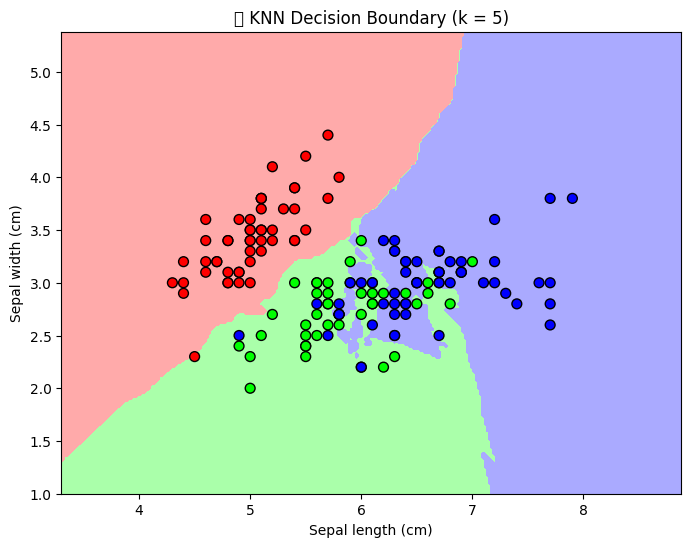

In [ ]:
# --- Visualizing KNN Decision Boundaries ---

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

# Load data
iris = load_iris()
X = iris.data[:, :2]  # Use only first two features for easy visualization
y = iris.target

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Create a mesh grid (like pixels for the background)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
plt.title("🌸 KNN Decision Boundary (k = 5)")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()


💬 **Discussion:**
- Notice how the colored regions represent **KNN’s decision boundaries** — areas where the algorithm assigns new samples to a specific class.
- The **boundaries are flexible and follow the data** — unlike linear models.
- Use our Interative Visualization, try changing `n_neighbors` (e.g., 1, 3, 10) to see how it affects the smoothness of boundaries.
